Задание:
Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
-устранение пропусков в данных;
-кодирование категориальных признаков;
-нормализацию числовых признаков.

311 service requests NYC (датасет) //www.kaggle.com/datasets/sheikmohamed/nyc-311-service-requests-for-2009

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

ModuleNotFoundError: No module named 'category_encoders'

In [3]:
# Загрузка данных из csv-файла
dataset = pd.read_csv(r'C:\Users\User\Desktop\маг 2сем\гапан\2лаба\311.csv')
dataset = dataset.sample(frac=0.01)
dataset.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5036\857819137.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r'C:\Users\User\Desktop\маг 2сем\гапан\2лаба\311.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
192819,31010915,07/06/2015 12:16:19 PM,07/06/2015 03:37:28 PM,NYPD,New York City Police Department,Animal Abuse,Other (complaint details),Residential Building/House,10464.0,51 HAWKINS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.845878,-73.788856,"(40.84587806017173, -73.78885606584095)"
9654,32240080,12/20/2015 11:58:51 PM,12/21/2015 07:41:28 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10467.0,2910 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.868207,-73.864362,"(40.86820719017923, -73.86436166980643)"
77616,31766891,10/16/2015 05:36:58 PM,10/17/2015 06:30:32 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11377.0,59-40 48 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.738554,-73.905243,"(40.738554187515035, -73.9052433599083)"
144357,31336497,08/18/2015 11:01:53 PM,08/19/2015 01:03:09 AM,NYPD,New York City Police Department,Posting Advertisement,Vehicle,Street/Sidewalk,10312.0,177 LAREDO AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.549094,-74.173633,"(40.549093797686275, -74.17363282481907)"
280552,30438163,04/20/2015 04:43:02 PM,04/21/2015 01:12:45 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11229.0,1730 EAST 23 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.608238,-73.950145,"(40.60823849156734, -73.95014450288707)"


In [4]:
len(list(zip(dataset.columns, [i for i in dataset.dtypes])))
# список столбцов

53

In [5]:
cols_with_na = [c for c in dataset.columns if dataset[c].isnull().sum() > 0]
len(cols_with_na)
# список столбцов с пропусками

31

In [6]:
dataset.shape

(3646, 53)

In [7]:
[(c, dataset[c].isnull().mean()) for c in cols_with_na]
# список столбцов с процент пропусков

[('Closed Date', 0.006856829402084476),
 ('Descriptor', 0.020844761382336808),
 ('Location Type', 0.0005485463521667581),
 ('Incident Zip', 0.00877674163466813),
 ('Incident Address', 0.14454196379594075),
 ('Street Name', 0.14454196379594075),
 ('Cross Street 1', 0.15962698848052662),
 ('Cross Street 2', 0.16154690071311026),
 ('Intersection Street 1', 0.8554580362040592),
 ('Intersection Street 2', 0.857377948436643),
 ('Address Type', 0.009325287986834888),
 ('City', 0.00877674163466813),
 ('Landmark', 0.9994514536478333),
 ('Facility Type', 0.006856829402084476),
 ('Resolution Action Updated Date', 0.006856829402084476),
 ('X Coordinate (State Plane)', 0.012616566099835436),
 ('Y Coordinate (State Plane)', 0.012616566099835436),
 ('School or Citywide Complaint', 1.0),
 ('Vehicle Type', 1.0),
 ('Taxi Company Borough', 1.0),
 ('Taxi Pick Up Location', 1.0),
 ('Bridge Highway Name', 0.9994514536478333),
 ('Bridge Highway Direction', 0.9994514536478333),
 ('Road Ramp', 0.99945145364783

In [8]:
# разделение столбцов на удаляемые, сокращаемые и дополняемые
cols_with_na = dataset.columns[dataset.isnull().mean() > 0].tolist()

# на удаление колонки
cols_to_drop = []
# на удаление строк
rows_to_drop = []
# на дополнение
cols_to_impute = []

for c in cols_with_na:
    na_percentage = dataset[c].isnull().mean()
    if na_percentage > 0.3:
        cols_to_drop.append(c)
    elif na_percentage < 0.06:
        rows_to_drop.append(c)
    else:
        cols_to_impute.append(c)
        
len(cols_to_drop), len(rows_to_drop), len(cols_to_impute)

(14, 13, 4)

In [38]:
# удаляем колонки по списку
res = dataset.drop(cols_to_drop, axis=1)

# удаляем строки по сприску
res = res.dropna(subset = rows_to_drop)

res.shape, dataset.shape

((3521, 42), (3646, 53))

In [10]:
# для иллюстрации
data_drop = dataset[rows_to_drop].dropna()
data_drop.shape

(3521, 13)

In [11]:
def plot_hist_diff(old_ds, new_ds, cols, max_xticks=12):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)

        xtick_labels = ax.get_xticklabels()

        if len(xtick_labels) > max_xticks:
            xticks = ax.get_xticks()

            step = len(xticks) // max_xticks

            xticks_visible = xticks[::step]
            
            ax.set_xticks(xticks_visible)

            xtick_labels_new = []
            for label in ax.get_xticklabels():
                if len(label.get_text()) > 10:
                    label_text = label.get_text()[:7] + '...'
                else:
                    label_text = label.get_text()
                label_new = matplotlib.text.Text(x=label.get_position()[0], 
                                                  y=label.get_position()[1], 
                                                  text=label_text, 
                                                  fontproperties=label.get_fontproperties(),
                                                  rotation=label.get_rotation(),
                                                  ha='right')
                xtick_labels_new.append(label_new)
                    
            ax.set_xticklabels(xtick_labels_new)
                    
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

C:\Users\User\AppData\Local\Temp\ipykernel_5036\2474487185.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


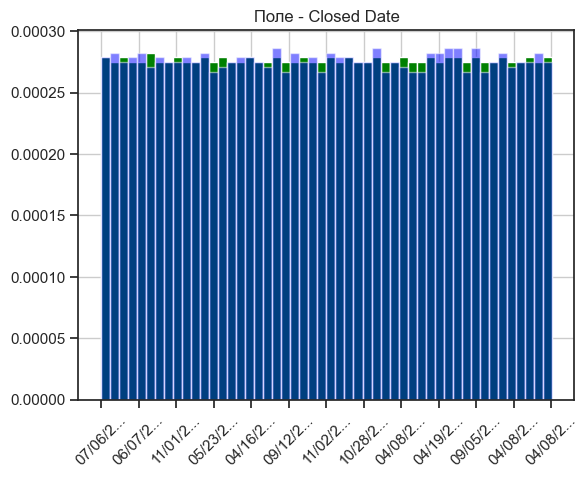

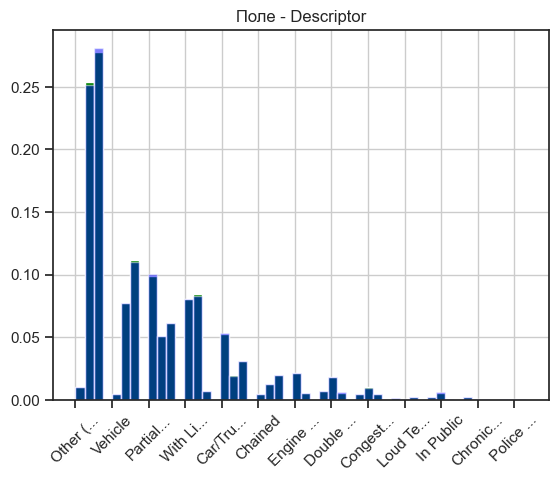

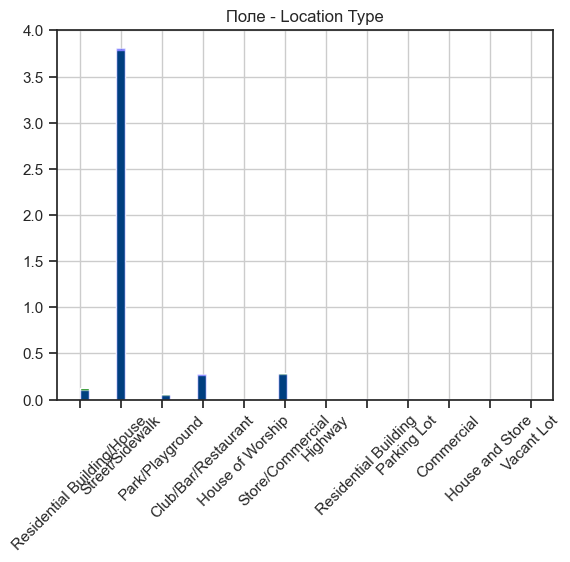

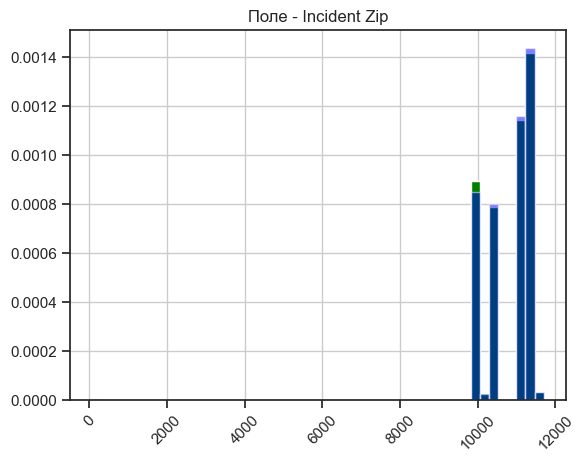

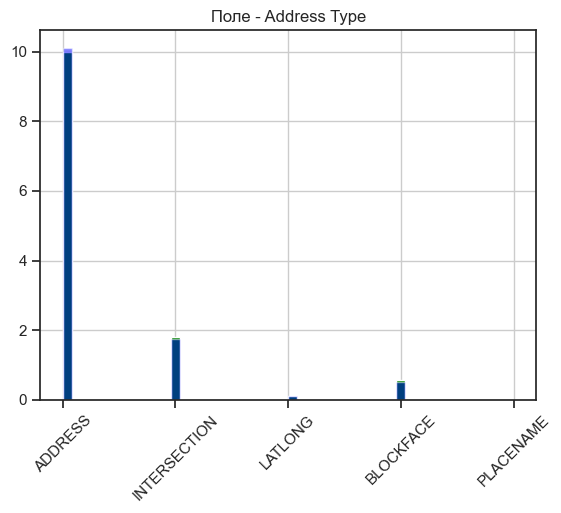

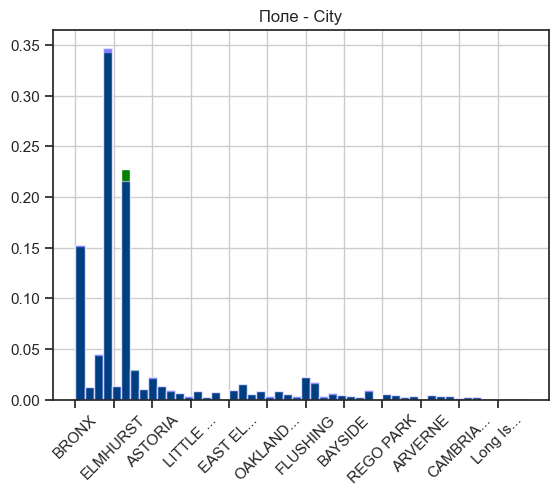

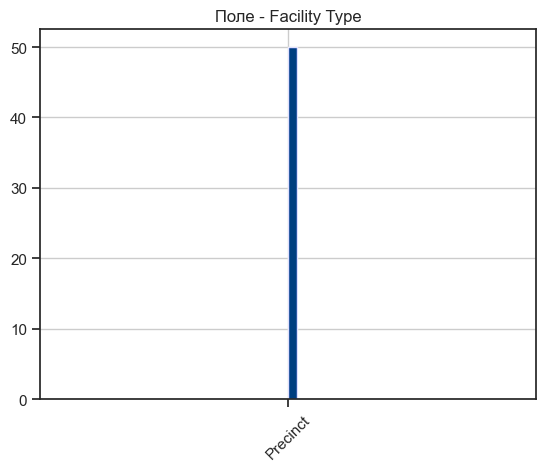

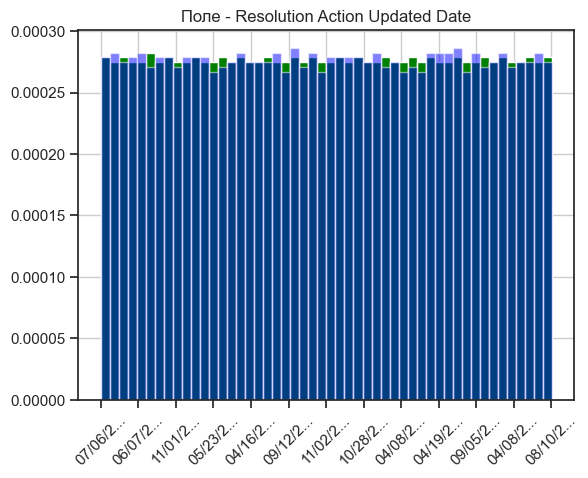

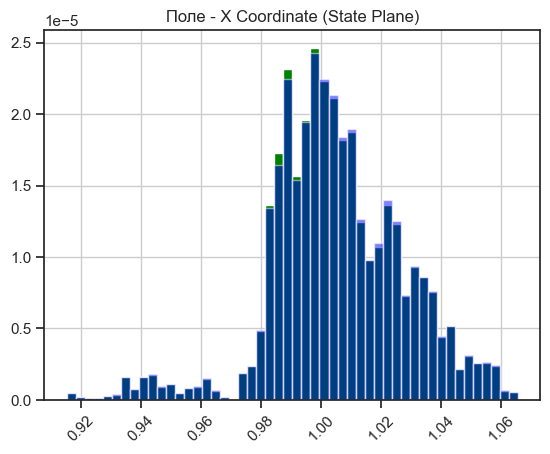

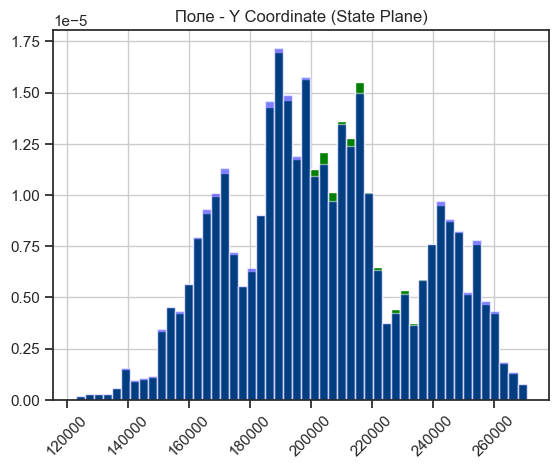

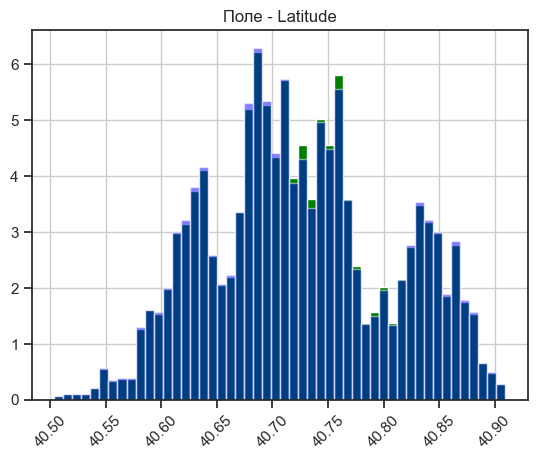

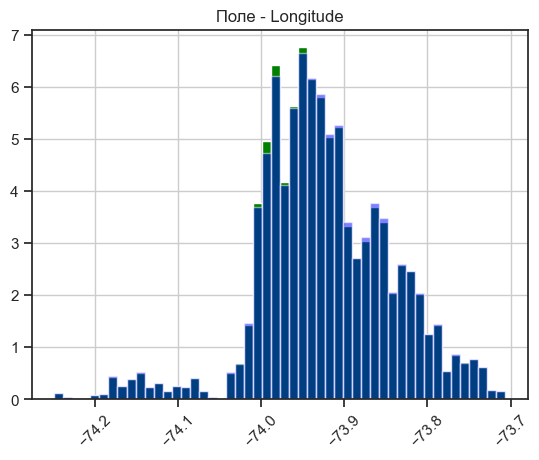

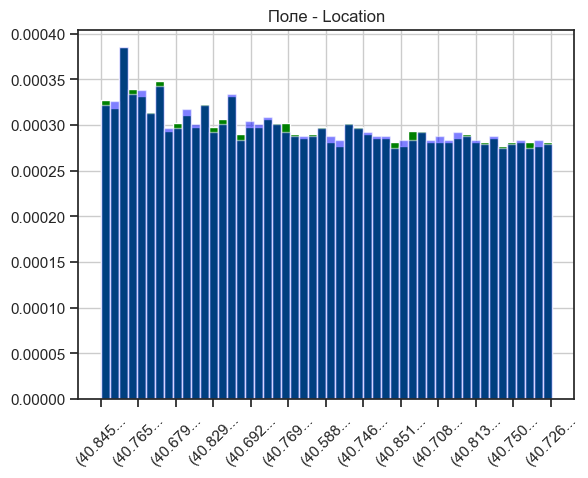

In [12]:
plot_hist_diff(dataset, data_drop, rows_to_drop)

Мы удалили строки по тем столбцам, где пропуски составляли небольшой процент (обычно не более 5%) и столбцы там, где пропусков было слишком много (>30%)

In [13]:
cols_with_na = [c for c in res.columns if res[c].isnull().sum() > 0]
len(list(zip(res.columns, [i for i in res.dtypes])))

39

In [14]:
[(c, res[c].isnull().mean()) for c in cols_with_na]

[('Incident Address', 0.14143709173530247),
 ('Street Name', 0.14143709173530247),
 ('Cross Street 1', 0.1499573984663448),
 ('Cross Street 2', 0.1499573984663448)]

Все пропущенные данные пренадлежат категориальным признакам

In [15]:
cols_with_na = [c for c in res.columns if res[c].isnull().sum() > 0]
cols_with_na

['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2']

In [16]:
def impute_most_frequent(df, cols_with_na):
    for col in cols_with_na:
        most_frequent_value = df[col].mode()[0]
        df[col].fillna(most_frequent_value, inplace=True)
    return df

In [17]:
res_new = res[cols_with_na].copy() 
[(c, res_new[c].isnull().mean()) for c in cols_with_na]

[('Incident Address', 0.14143709173530247),
 ('Street Name', 0.14143709173530247),
 ('Cross Street 1', 0.1499573984663448),
 ('Cross Street 2', 0.1499573984663448)]

In [18]:
res_new = impute_most_frequent(res_new, cols_with_na)
[(c, res_new[c].isnull().mean()) for c in cols_with_na]

[('Incident Address', 0.0),
 ('Street Name', 0.0),
 ('Cross Street 1', 0.0),
 ('Cross Street 2', 0.0)]

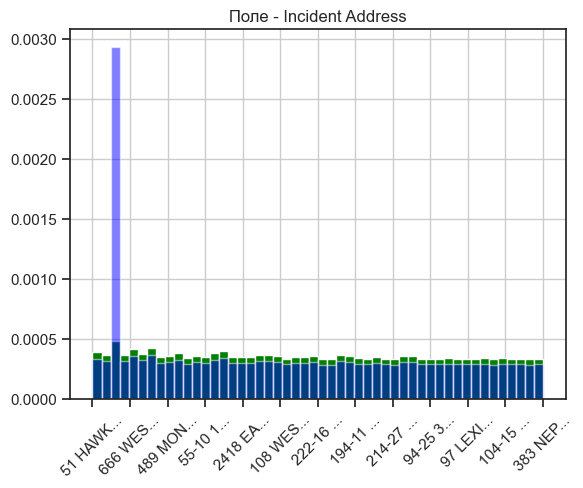

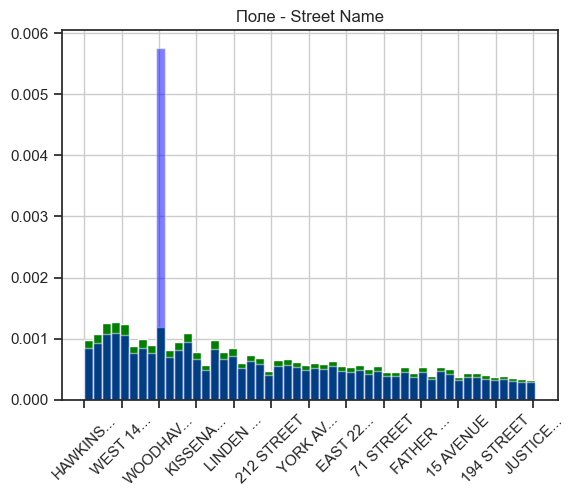

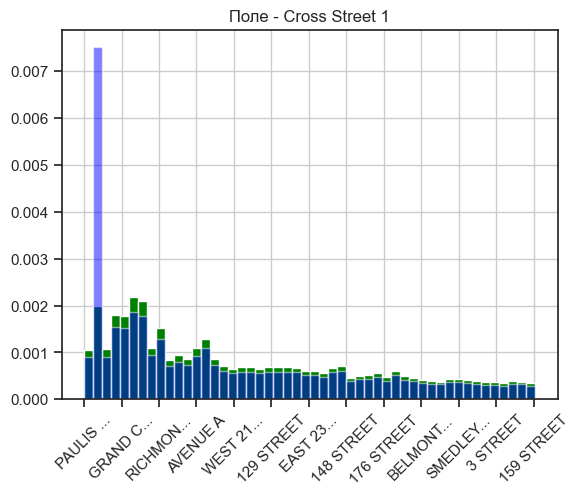

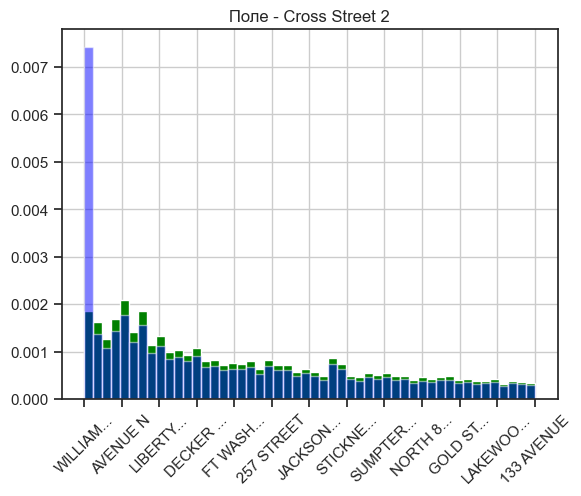

In [19]:
plot_hist_diff(res, res_new, cols_with_na)

Видим, что заполнение наиболее разпространенным значением существенно меняет распрделение данных.

In [20]:
res_new = res[cols_to_impute].copy() 

In [21]:
res_new['Street Name'].fillna('Unknown Street', inplace =True)
res_new['Cross Street 1'].fillna('Unknown Street', inplace =True)
res_new['Cross Street 2'].fillna('Unknown Street', inplace =True)
res_new['Incident Address'].fillna('Unknown Address', inplace =True)

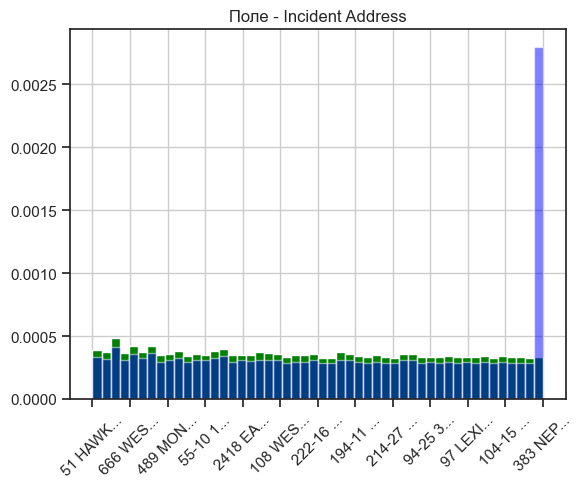

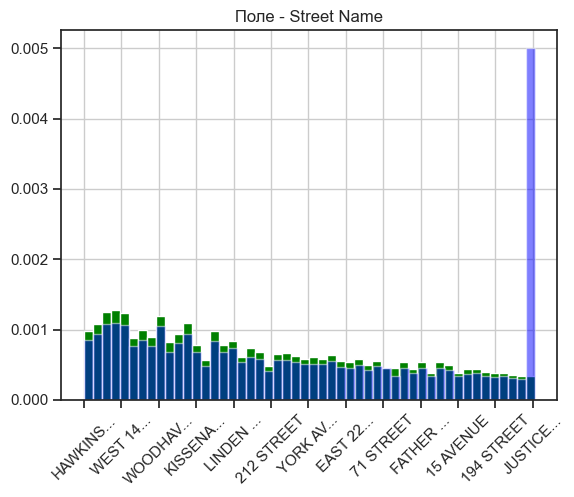

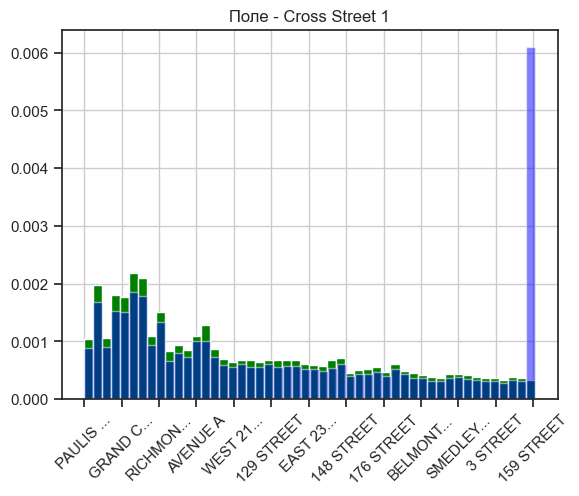

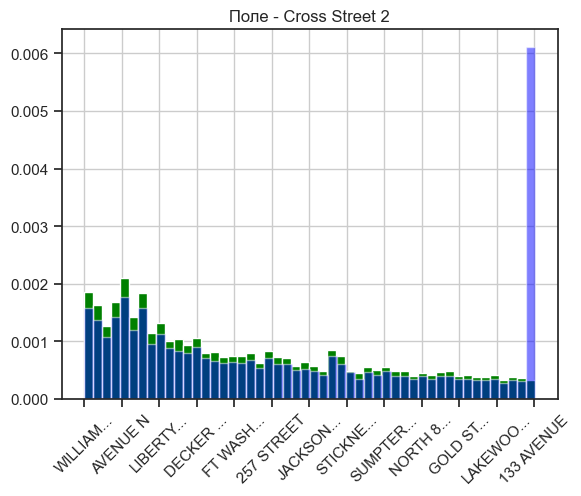

In [22]:
plot_hist_diff(res, res_new, cols_to_impute)

In [23]:
res['Street Name'].fillna('Unknown Street', inplace =True)
res['Cross Street 1'].fillna('Unknown Street', inplace =True)
res['Cross Street 2'].fillna('Unknown Street', inplace =True)
res['Incident Address'].fillna('Unknown Address', inplace =True)

Теперь необходимо произвести кодирование категориальных признаков

In [24]:
# # для начала удалим колонки с пустыми значениями не обнаруженные ранее
# cols_with_na = [c for c in res.columns if res[c].isnull().sum() > 0]
# cols_with_na
# thresh = 0.3 
# na_values = ['Unspecified', 'N']  

# cols_to_drop = []
# for col in res.columns:
#     na_count = res[col].isin(na_values).sum()
#     if na_count / len(res) > thresh:
#         cols_to_drop.append(col)

# res.drop(cols_to_drop, axis=1, inplace=True)

In [39]:
 list(zip(res.columns, [i for i in res.dtypes]))

[('Unique Key', dtype('int64')),
 ('Created Date', dtype('O')),
 ('Closed Date', dtype('O')),
 ('Agency', dtype('O')),
 ('Agency Name', dtype('O')),
 ('Complaint Type', dtype('O')),
 ('Descriptor', dtype('O')),
 ('Location Type', dtype('O')),
 ('Incident Zip', dtype('float64')),
 ('Incident Address', dtype('O')),
 ('Street Name', dtype('O')),
 ('Cross Street 1', dtype('O')),
 ('Cross Street 2', dtype('O')),
 ('Intersection Street 1', dtype('O')),
 ('Intersection Street 2', dtype('O')),
 ('Address Type', dtype('O')),
 ('City', dtype('O')),
 ('Landmark', dtype('O')),
 ('Facility Type', dtype('O')),
 ('Status', dtype('O')),
 ('Due Date', dtype('O')),
 ('Resolution Description', dtype('O')),
 ('Resolution Action Updated Date', dtype('O')),
 ('Community Board', dtype('O')),
 ('Borough', dtype('O')),
 ('X Coordinate (State Plane)', dtype('float64')),
 ('Y Coordinate (State Plane)', dtype('float64')),
 ('Park Borough', dtype('O')),
 ('School or Citywide Complaint', dtype('float64')),
 ('Vehic

<Axes: >

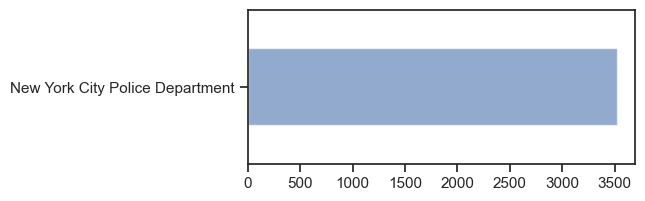

In [49]:
res['Agency Name'].value_counts().plot(kind='barh',alpha=0.6,figsize=(5,2))

<Axes: >

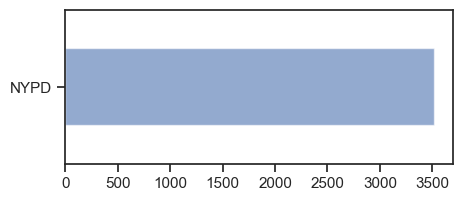

In [50]:
res['Agency'].value_counts().plot(kind='barh',alpha=0.6,figsize=(5,2))

<Axes: >

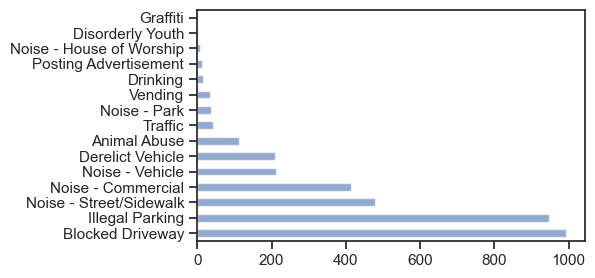

In [52]:
res['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(5,3))

<Axes: >

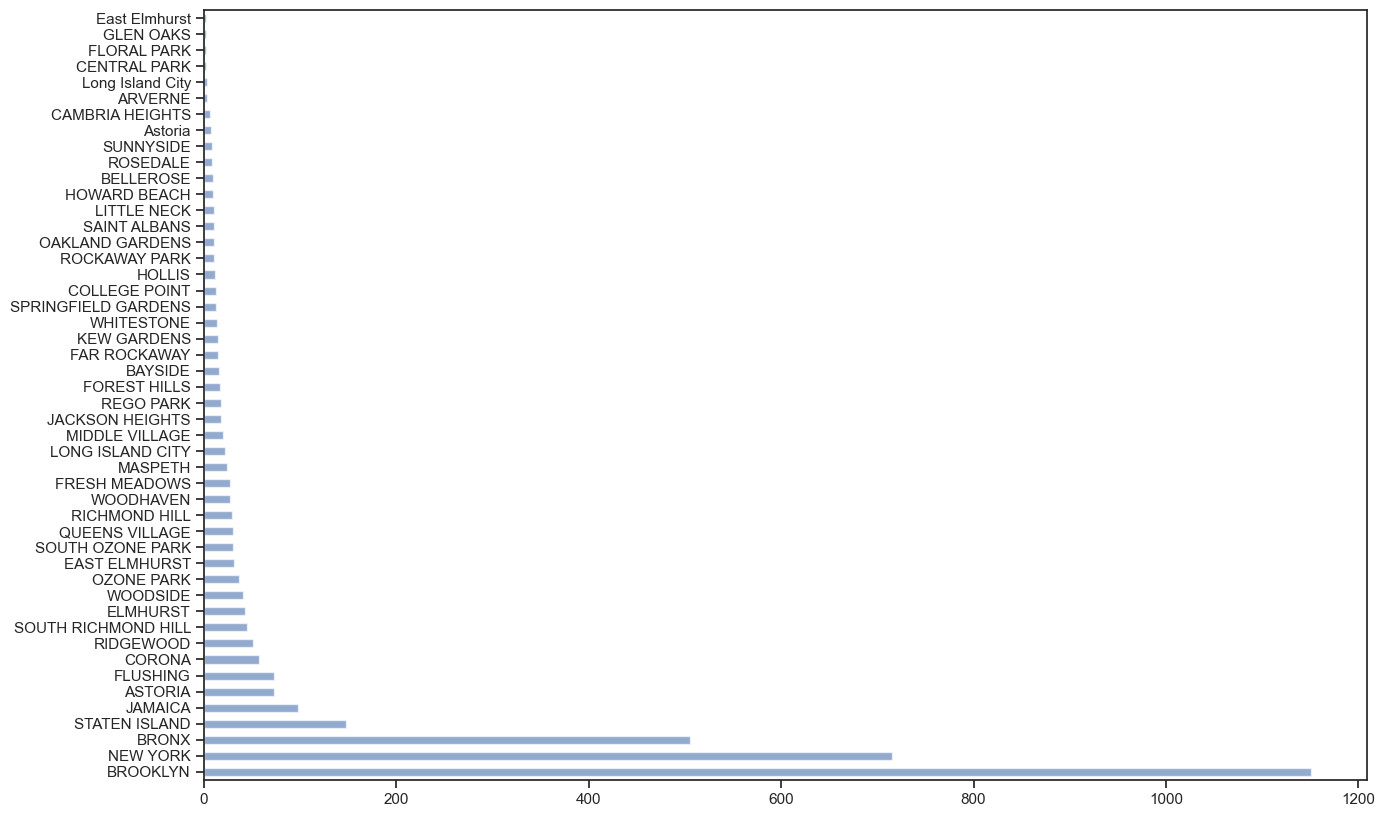

In [58]:
res['City'].value_counts().plot(kind='barh',alpha=0.6,figsize=(15,10))

In [72]:
# отберем колонки с признаками для кодирования
cols_to_code = ['Created Date','Closed Date', 
                'Complaint Type','City','Latitude','Longitude']

In [105]:
res_code = res[cols_to_code]


In [106]:
res_code.head()

,Created Date,Closed Date,Complaint Type,City,Latitude,Longitude
192819,07/06/2015 12:16:19 PM,07/06/2015 03:37:28 PM,Animal Abuse,BRONX,40.845878,-73.788856
9654,12/20/2015 11:58:51 PM,12/21/2015 07:41:28 AM,Noise - Street/Sidewalk,BRONX,40.868207,-73.864362
77616,10/16/2015 05:36:58 PM,10/17/2015 06:30:32 AM,Blocked Driveway,WOODSIDE,40.738554,-73.905243
144357,08/18/2015 11:01:53 PM,08/19/2015 01:03:09 AM,Posting Advertisement,STATEN ISLAND,40.549094,-74.173633
280552,04/20/2015 04:43:02 PM,04/21/2015 01:12:45 AM,Illegal Parking,BROOKLYN,40.608238,-73.950145


Даты и координаты - числовые признаки, требующие нормализации. Районы NY и типы жалоб - категориальные признаки, требующие кодирования. Поскольку вероятно, что при обработке данных придется решать задачу определения по координатам района, то кодирование данных о районах должно позволять и обратное декодирование. Используем OneHot. 

In [74]:
# # !pip install category_encoders 
# from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder
# ce_TargetEncoder1 = ce_TargetEncoder()
# data_MEAN_ENC = ce_TargetEncoder1.fit_transform(res_code[res_code.columns.difference(['City'])], res_code['City'])

pd.get_dummies(res_code[['Complaint Type']]).head()

,Complaint Type_Animal Abuse,Complaint Type_Blocked Driveway,Complaint Type_Derelict Vehicle,Complaint Type_Disorderly Youth,Complaint Type_Drinking,Complaint Type_Graffiti,Complaint Type_Illegal Parking,Complaint Type_Noise - Commercial,Complaint Type_Noise - House of Worship,Complaint Type_Noise - Park,Complaint Type_Noise - Street/Sidewalk,Complaint Type_Noise - Vehicle,Complaint Type_Posting Advertisement,Complaint Type_Traffic,Complaint Type_Vending
192819,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9654,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
77616,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
144357,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
280552,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [64]:
pd.get_dummies(res_code[['City']]).head()


,City_ARVERNE,City_ASTORIA,City_Astoria,City_BAYSIDE,City_BELLEROSE,City_BRONX,City_BROOKLYN,City_CAMBRIA HEIGHTS,City_CENTRAL PARK,City_COLLEGE POINT,...,City_ROSEDALE,City_SAINT ALBANS,City_SOUTH OZONE PARK,City_SOUTH RICHMOND HILL,City_SPRINGFIELD GARDENS,City_STATEN ISLAND,City_SUNNYSIDE,City_WHITESTONE,City_WOODHAVEN,City_WOODSIDE
192819,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9654,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
144357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
280552,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь нормализуем числовые признаки

In [95]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

array([[<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude_boxcox'}>, <Axes: >]],
      dtype=object)

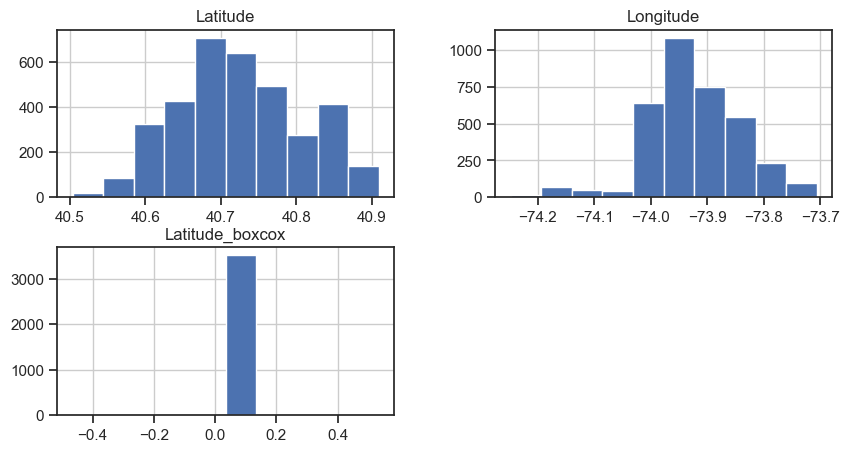

In [102]:
res_code.hist(figsize=(10,5))

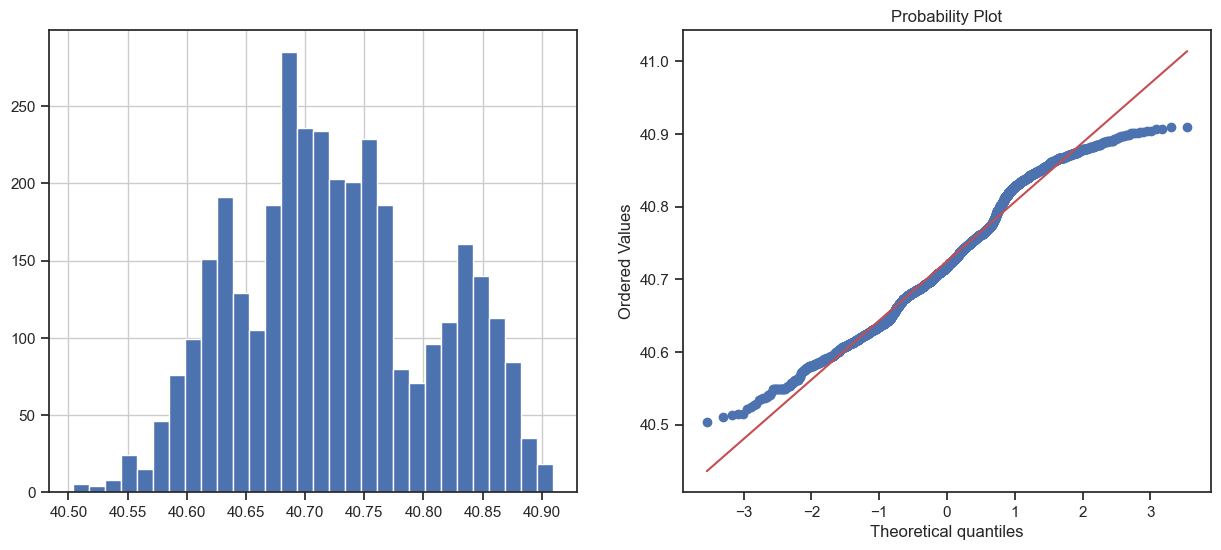

In [82]:
diagnostic_plots(res_code,'Latitude')

array([0.03434994, 0.03434994, 0.03434994, ..., 0.03434994, 0.03434994,
       0.03434994])

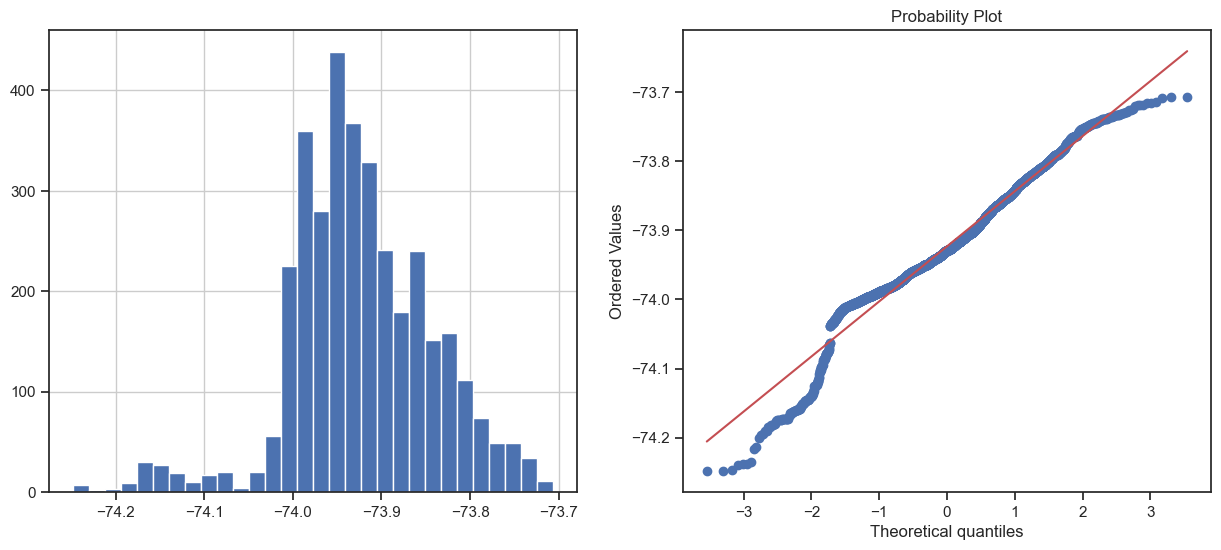

In [83]:
diagnostic_plots(res_code,'Longitude')